## Image Classifier Using Keras

In [1]:
from tensorflow import keras

fashaion_mnist = keras.datasets.fashion_mnist
(xtrain_full, ytrain_full), (xtest,ytest) = fashaion_mnist.load_data()

In [2]:
xtrain_full.shape

(60000, 28, 28)

In [3]:
xtrain_full.dtype

dtype('uint8')

In [4]:
xvalid, xtrain = xtrain_full[:5000] / 255.0, xtrain_full[5000:] / 255.0
yvalid, ytrain = ytrain_full[:5000], ytrain_full[5000:]

In [5]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                   "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

class_names[ytrain[0]]

'Coat'

In [6]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.layers

In [10]:
model.layers[1].name

'dense'

In [13]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [14]:
history = model.fit(xtrain, ytrain, epochs=30, validation_data=(xvalid, yvalid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 7s 130us/sample - loss: 0.6952 - accuracy: 0.7711 - val_loss: 0.4931 - val_accuracy: 0.8310
Epoch 2/30
55000/55000 [==============================] - 6s 113us/sample - loss: 0.4809 - accuracy: 0.8322 - val_loss: 0.4387 - val_accuracy: 0.8520
Epoch 3/30
55000/55000 [==============================] - 6s 113us/sample - loss: 0.4384 - accuracy: 0.8472 - val_loss: 0.4184 - val_accuracy: 0.8576
Epoch 4/30
55000/55000 [==============================] - 6s 109us/sample - loss: 0.4132 - accuracy: 0.8550 - val_loss: 0.4087 - val_accuracy: 0.8574
Epoch 5/30
55000/55000 [==============================] - 6s 112us/sample - loss: 0.3929 - accuracy: 0.8616 - val_loss: 0.3982 - val_accuracy: 0.8616
Epoch 6/30
55000/55000 [==============================] - 6s 110us/sample - loss: 0.3780 - accuracy: 0.8670 - val_loss: 0.3818 - val_accuracy: 0.8630
Epoch 7/30
55000/55000 [===========================

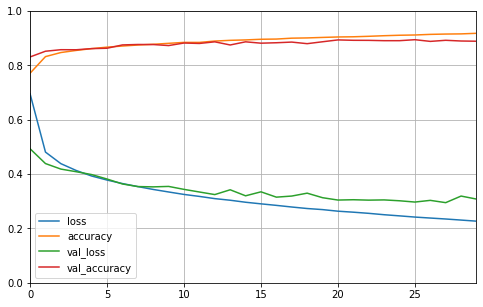

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show();

In [18]:
model.evaluate(xtest, ytest)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[71.6320028807044, 0.8349]

In [21]:
xnew = xtest[:3]
y_proba = model.predict(xnew)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [23]:
y_pred = model.predict_classes(xnew)
y_pred

array([9, 2, 1])

In [24]:
import numpy as np
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

### Regression MLP Using Sequential API

In [2]:
from tensorflow import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

Xtrain_full,Xtest, ytrain_full, ytest = train_test_split(housing.data, housing.target)

Xtrain, Xvalid, ytrain, yvalid = train_test_split(Xtrain_full, ytrain_full)

In [3]:
scalar = StandardScaler()
Xtrain_scaled = scalar.fit_transform(Xtrain)
Xvalid_scaled = scalar.fit_transform(Xvalid)
Xtest_scaled = scalar.fit_transform(Xtest)

In [5]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=Xtrain.shape[1:]),
    keras.layers.Dense(1)
])

In [6]:
model.compile(loss='mean_squared_error', optimizer='sgd')

history = model.fit(Xtrain, ytrain, epochs=20, validation_data=(Xvalid, yvalid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 2s 142us/sample - loss: nan - val_loss: nan
Epoch 2/20
11610/11610 [==============================] - 1s 64us/sample - loss: nan - val_loss: nan
Epoch 3/20
11610/11610 [==============================] - 1s 66us/sample - loss: nan - val_loss: nan
Epoch 4/20
11610/11610 [==============================] - 1s 71us/sample - loss: nan - val_loss: nan
Epoch 5/20
11610/11610 [==============================] - 1s 70us/sample - loss: nan - val_loss: nan
Epoch 6/20
11610/11610 [==============================] - 1s 68us/sample - loss: nan - val_loss: nan
Epoch 7/20
11610/11610 [==============================] - 1s 64us/sample - loss: nan - val_loss: nan
Epoch 8/20
11610/11610 [==============================] - 1s 81us/sample - loss: nan - val_loss: nan
Epoch 9/20
11610/11610 [==============================] - 1s 77us/sample - loss: nan - val_loss: nan
Epoch 10/20
11610/11610 [================

In [7]:
mse_test = model.evaluate(Xtest, ytest)

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [10]:
Xnew = Xtest[:5]
y_pred = model.predict(Xnew)

In [11]:
y_pred

array([[nan],
       [nan],
       [nan],
       [nan],
       [nan]], dtype=float32)

### Building Models With Functional API

In [12]:
input = keras.layers.Input(shape=Xtrain.shape[:1])
hidden1 = keras.layers.Dense(30, activation='relu')(input)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.Concatenate()[input, hidden2]
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input], outputs=[output])

TypeError: 'Concatenate' object is not subscriptable